# 15.2 Classification (Titanic)

In [1]:
#conda install matplotlib scikit-learn pandas jupyterlab seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#plt.style.use('ggplot')
plt.style.use('seaborn-paper')

# Read and Explore Data

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


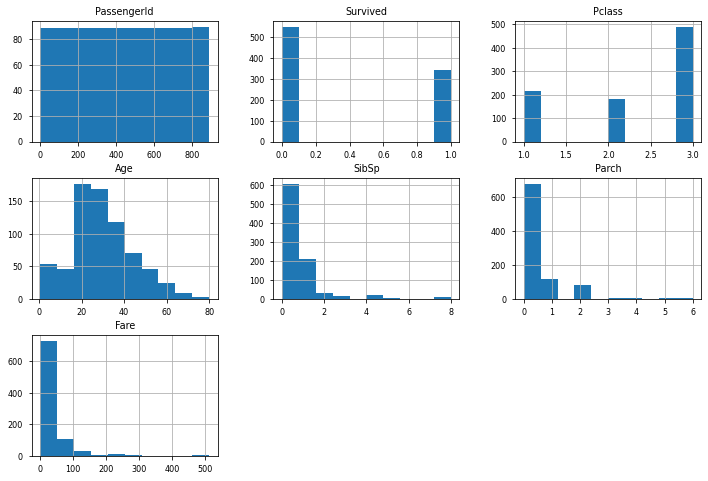

In [5]:
df.hist(figsize=(12,8));

# Plan for Data Preparation

```
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object

Drop Column: PassengerId, Name, Ticket, Cabin
Drop Row: Age, Embarked
Convert Categorical data to numeric data: Sex, Embarked
```

In [6]:
#Drop Column: PassengerId, Name, Ticket, Cabin
df1=df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)

In [7]:
df1.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [8]:
#Drop Row: Age, Embarked
df2=df1.dropna()

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [10]:
%%timeit -n1
pd.options.mode.chained_assignment = None
df3=df2
df3.loc[:,'sex_cat_old']=0
df3.loc[df3.Sex=='male','sex_cat_old']=1
#df3.head()

1 loop, best of 3: 1.48 ms per loop


In [11]:
%%timeit -n1
df4=df2
df4.loc[:,'sex_cat']=df4['Sex'].astype('category').cat.codes
#df4.head()

1 loop, best of 3: 1.74 ms per loop


In [12]:
df4=df2
df4['sex_cat']=df4['Sex'].astype('category').cat.codes
df4['embarked_cat']=df4['Embarked'].astype('category').cat.codes

In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      712 non-null    int64  
 1   Pclass        712 non-null    int64  
 2   Sex           712 non-null    object 
 3   Age           712 non-null    float64
 4   SibSp         712 non-null    int64  
 5   Parch         712 non-null    int64  
 6   Fare          712 non-null    float64
 7   Embarked      712 non-null    object 
 8   sex_cat_old   712 non-null    int64  
 9   sex_cat       712 non-null    int8   
 10  embarked_cat  712 non-null    int8   
dtypes: float64(2), int64(5), int8(2), object(2)
memory usage: 57.0+ KB


In [14]:
header=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex_cat', 'embarked_cat']
df5=df4[header]
df5.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_cat,embarked_cat
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2
6,0,1,54.0,0,0,51.8625,1,2
7,0,3,2.0,3,1,21.0750,1,2
8,1,3,27.0,0,2,11.1333,0,2
9,1,2,14.0,1,0,30.0708,0,0
10,1,3,4.0,1,1,16.7000,0,2


# Convert Dataframe to numpy-array

In [15]:
yx=df5.to_numpy()

In [16]:
yx

array([[ 0.    ,  3.    , 22.    , ...,  7.25  ,  1.    ,  2.    ],
       [ 1.    ,  1.    , 38.    , ..., 71.2833,  0.    ,  0.    ],
       [ 1.    ,  3.    , 26.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  1.    , 19.    , ..., 30.    ,  0.    ,  2.    ],
       [ 1.    ,  1.    , 26.    , ..., 30.    ,  1.    ,  0.    ],
       [ 0.    ,  3.    , 32.    , ...,  7.75  ,  1.    ,  1.    ]])

In [18]:
yx.shape

(712, 8)

In [19]:
x_train=yx[:,1:]
y_train=yx[:,0]

In [20]:
x_train.shape

(712, 7)

In [21]:
y_train.shape

(712,)

# Supervised Learning: Classification and  and Cross-validation

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [23]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
import numpy as np
from sklearn.model_selection import cross_val_score
np.average( cross_val_score(clf, x_train, y_train, cv=5) )
#do not use training set for evaluation

0.7654880330936669

In [25]:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex_cat', 'embarked_cat']
x_train[:5,:]

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ,  2.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,  2.    ],
       [ 1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ,  2.    ],
       [ 3.    , 35.    ,  0.    ,  0.    ,  8.05  ,  1.    ,  2.    ]])

In [26]:
clf.predict(x_train[:5,:])

array([0., 1., 1., 1., 0.])

In [27]:
#Jack
clf.predict([[3,24,0,0,0,1,0]])

array([0.])

In [28]:
#Rose
clf.predict([[1,23,1,1,10,0,0]])

array([1.])

# Save model

In [29]:
import pickle
filename = 'titanic.model'
pickle.dump(clf, open(filename, 'wb'))

In [30]:
#reading model for prediction
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_train[:5,:])

array([0., 1., 1., 1., 0.])